# PREDICTION USING SUPERVISED ML

## DATA SCIENCE AND BISINESS ANALYTICS TASK 

#### This is a simple linear regression task as it involves just 2 variables.

### OBJECTIVE

1) Predict the percentage of an student based on the no. of study hours.


2) What will be predicted score if a student studies for 9.25 hrs/ day?

## IMPORTING THE REQUIRED PYTHON LIBRARY

In [1]:
import numpy as np
import pandas as pd  
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn import metrics
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split

### IMPORTING DATASET

In [3]:
data = pd.read_excel("Task 1 DSBA _Dataset.xlsx")

In [4]:
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


### UNDERSTANDING THE DATASET

In [6]:
data.shape

(25, 2)

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [9]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


There are total 25 rows and 2 columns

There are no null values

Maximum hours studen studied is 9.2 hours and the corresponding score achived is 95

Minimum hours studen studied is 1.1 hours and the corresponding score achived is 17

## EXPLORATORY DATA ANALYSIS

### NULL VALUE CHECK

In [13]:
data.isnull().sum()

Hours     0
Scores    0
dtype: int64

### UNIVARIATE ANALYSIS

##### BOXPLOT

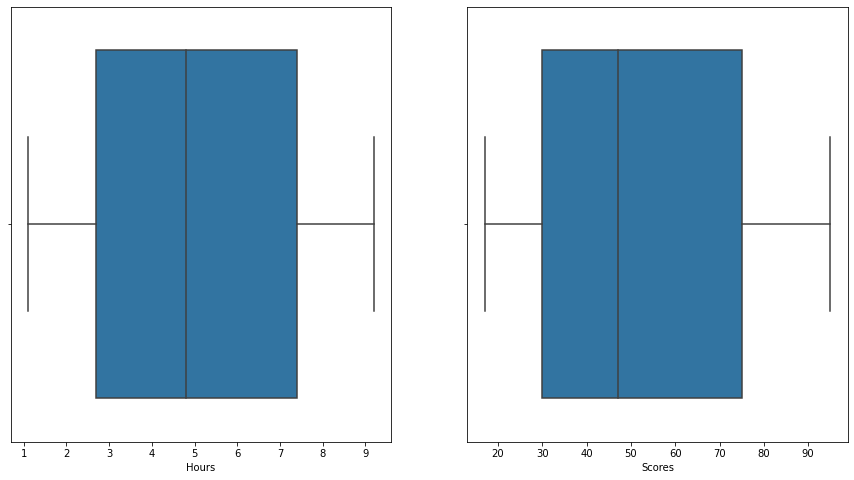

In [14]:
plt.figure(figsize=(15,8))
plt.subplot(1,2,1)
sns.boxplot(x = 'Hours',data = data)

plt.subplot(1,2,2)
sns.boxplot(x = 'Scores', data = data)
plt.show()

There are no outliers in the dataset and the variable 'Hours' is nearly normally distributed

### BIVARIATE ANALYSIS

#### SCATTER PLOT

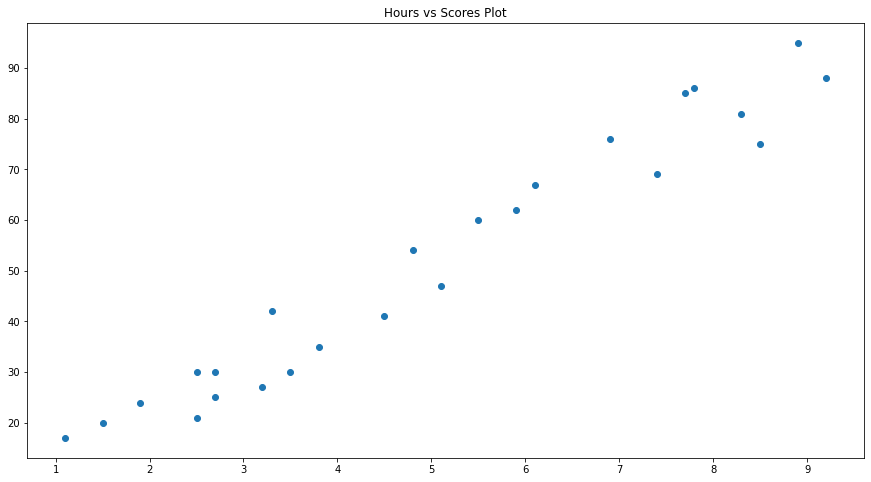

In [17]:
plt.figure(figsize=(15,8))
plt.scatter(x = 'Hours', y = 'Scores', data = data)
plt.title("Hours vs Scores Plot")
plt.show()

#### CORRELATION PLOT

In [18]:
data.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


##### HEATMAP

<AxesSubplot:>

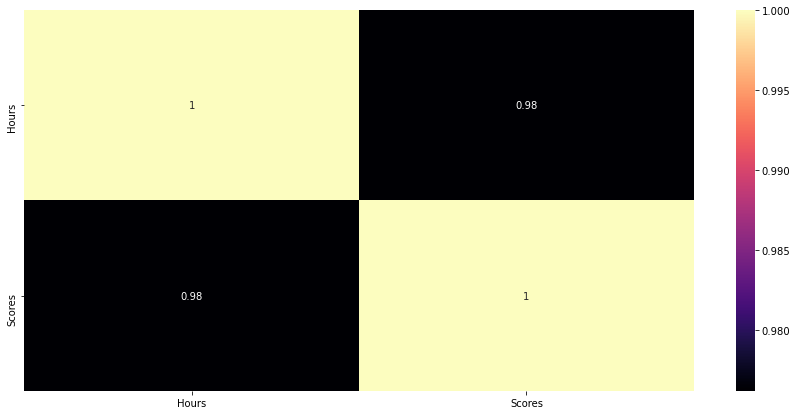

In [19]:
plt.figure(figsize = (15,7))
sns.heatmap(data.corr(), annot = True, cmap = 'magma')

From the scatter plot we can see that, there is an increase in trend, means as the no. of the study hours increases , scores also gets increased and the similar insight we can draw from the heatmap as well, there is high positive correlation between Hours and the Scores.¶

#### SEPERATING INDEPENDENT VARIABLE AND DEPENDENT VARIABLE

In [20]:
# Copy all the predictor variables into X dataframe
X = data.drop('Scores', axis=1)

# Copy target into the y dataframe. 
y = data[['Scores']]

In [21]:
X.head()

,Hours
0,2.5
1,5.1
2,3.2
3,8.5
4,3.5


#### SPLITTING THE DATASET INTO train and test DATASET

In [23]:
# Split X and y into training and test set in 80:20 ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20 , random_state=1)

In [24]:
print( "X_train:" , X_train.shape)
print( "X_test:" , X_test.shape)
print( "y_train:" , y_train.shape)
print( "y_test:" , y_test.shape)

X_train: (20, 1)
X_test: (5, 1)
y_train: (20, 1)
y_test: (5, 1)


#### BUILDING THE LINEAR REGRESSION MODEL

In [25]:
# invoke the LinearRegression function and find the bestfit model on training data
reg_model = LinearRegression()
reg_model.fit(X_train, y_train)

LinearRegression()

In [26]:
# Let us explore the coefficient for the independent attribute
for idx,col_name in enumerate(X_train.columns):
    print("The coefficient for {} is {}". format(col_name, reg_model.coef_[0][idx]))

The coefficient for Hours is 10.461108293576173


In [27]:
# Let us check the intercept for the model

intercept = reg_model.intercept_[0]

print("The intercept for our model is {}".format(intercept))

The intercept for our model is -1.5369573315500702


In [28]:
# Prediction on Training set.
y_train_predict = reg_model.predict(X_train)
y_train_predict

array([[79.01357653],
       [62.27580326],
       [75.87524404],
       [35.0769217 ],
       [31.93858921],
       [26.70803506],
       [94.70523897],
       [55.99913828],
       [38.21525418],
       [51.81469497],
       [24.6158134 ],
       [24.6158134 ],
       [91.56690648],
       [80.05968736],
       [70.64468989],
       [26.70803506],
       [85.29024151],
       [45.53802999],
       [60.1835816 ],
       [14.15470511]])

In [29]:
# Prediction on Testing set.
y_test_predict = reg_model.predict(X_test)
y_test_predict

array([[ 9.97026179],
       [32.98470004],
       [18.33914843],
       [87.38246316],
       [48.67636248]])

#### METRIC FOR LINEAR REGRESSION

In [30]:
# R square on testing data
r2_score(y_train,y_train_predict)

0.9637848283990599

In [31]:
# R square on testing data
r2_score(y_test,y_test_predict)

0.8421031525243527

In [32]:
#RMSE on Test data
np.sqrt(metrics.mean_squared_error(y_test, y_test_predict))

8.299453038771674

#### Equation for Linear Regression is:
Score = Intercept + Coefficient * Hours

ie. Score = -1.537 + 10.461 * No. of Hours

#### OUR OBJECTIVE IS TO PREDICT THE SCORE IF A STUDENT STUDIES FOR 9.25 HOURS A DAY

In [35]:
Hours = 9.25
Score = -1.537 + 10.461 * (Hours)
Score

95.22725

### HENCE

From the above result we can see that if a student studies for 9.25 hours a day, then the predicted score will be 95.2275.

# THANK YOU